<a href="https://colab.research.google.com/github/SwethaR125/exploratory-data-analysis/blob/main/Exploratory%20Data%20Analysis%20Theory%20(TH)%20Digital%20Assessment-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello world this is my first trail on github")

hello world this is my first trail on github


In [4]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("drug200.csv")

In [7]:
print("Dataset dimensions (rows, columns):", data.shape)
print("First 5 rows of the dataset:\n", data.head())

Dataset dimensions (rows, columns): (200, 6)
First 5 rows of the dataset:
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [8]:
print("Column names:", data.columns.tolist())

Column names: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [10]:
print(data.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [11]:
categorical_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
print(data[categorical_columns].describe())

        Sex    BP Cholesterol   Drug
count   200   200         199    199
unique    2     3           3      6
top       M  HIGH        HIGH  DrugY
freq    104    77         102     89


In [12]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64


In [13]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


In [14]:
data = data.drop_duplicates()

In [15]:
numerical_columns = ['Na_to_K']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [16]:
for col in categorical_columns:
    mode_values = data[col].mode()
    if not mode_values.empty:
        data[col] = data[col].fillna(mode_values.iloc[0])

In [17]:
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values after cleaning:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


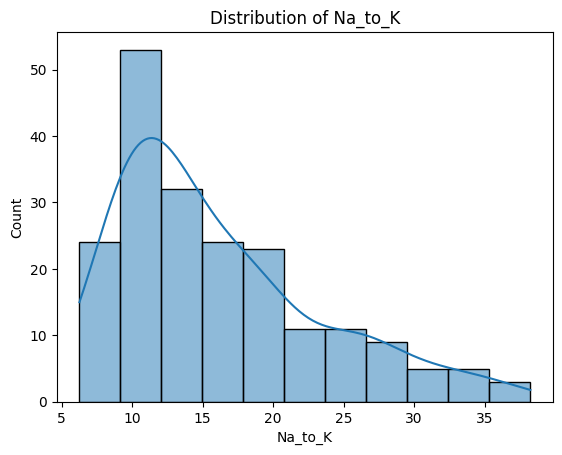

In [18]:
sns.histplot(data['Na_to_K'], kde=True)
plt.title("Distribution of Na_to_K")
plt.show()

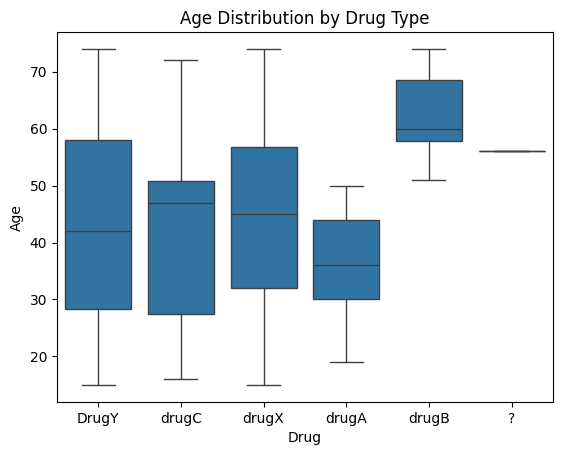

In [19]:
sns.boxplot(x='Drug', y='Age', data=data)
plt.title("Age Distribution by Drug Type")
plt.show()

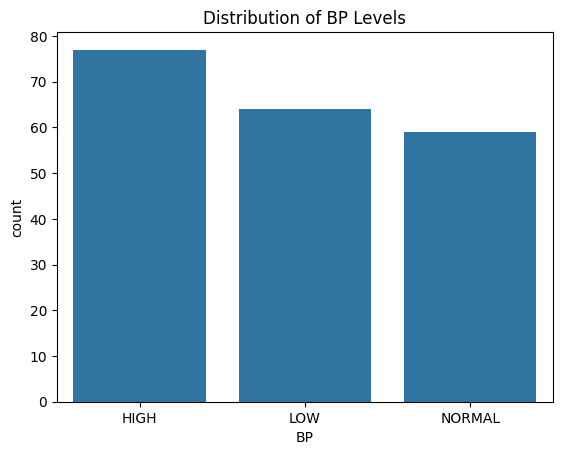

In [20]:
sns.countplot(x='BP', data=data)
plt.title("Distribution of BP Levels")
plt.show()

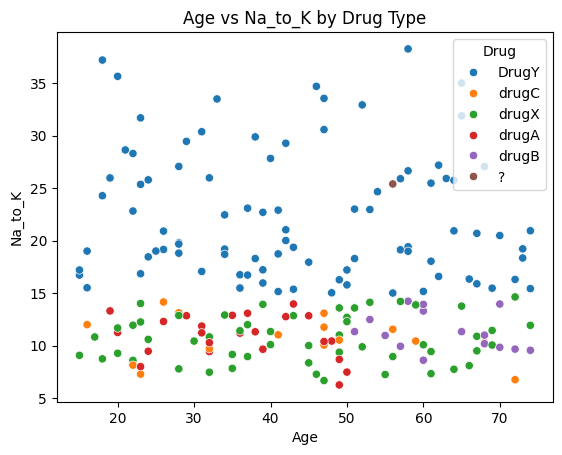

In [21]:
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=data)
plt.title("Age vs Na_to_K by Drug Type")
plt.show()

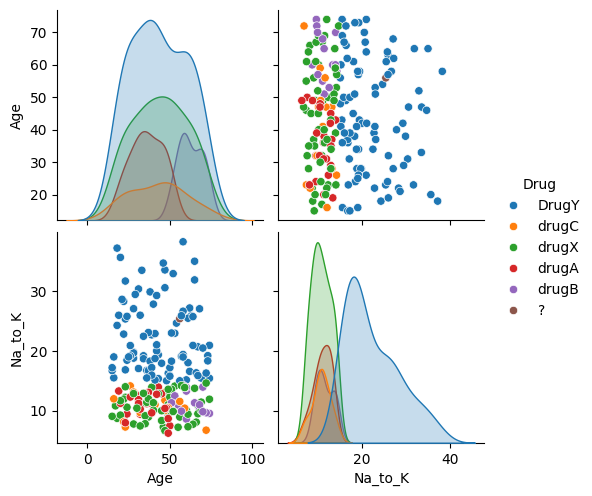

In [22]:
sns.pairplot(data, hue='Drug', vars=['Age', 'Na_to_K'])
plt.show()

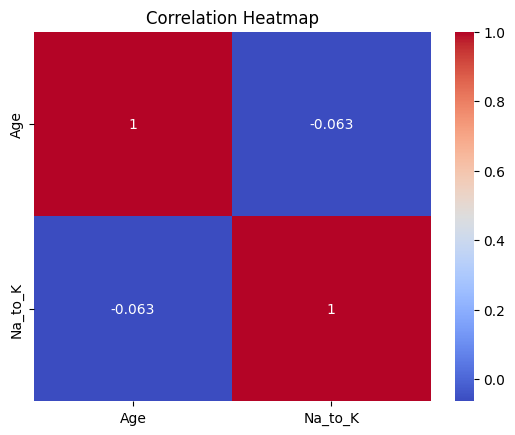

In [23]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Discretization and binning for Age
bins = [0, 20, 40, 60, 80]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']
data['Age_Bin'] = pd.cut(data['Age'], bins=bins, labels=labels)
print("Age bins added:\n", data[['Age', 'Age_Bin']].head())

Age bins added:
    Age      Age_Bin
0   23  Young Adult
1   47        Adult
2   47        Adult
3   28  Young Adult
4   61       Senior


Correlation Matrix:
               Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000


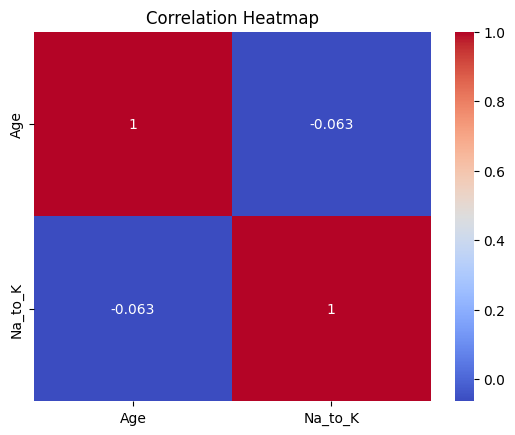

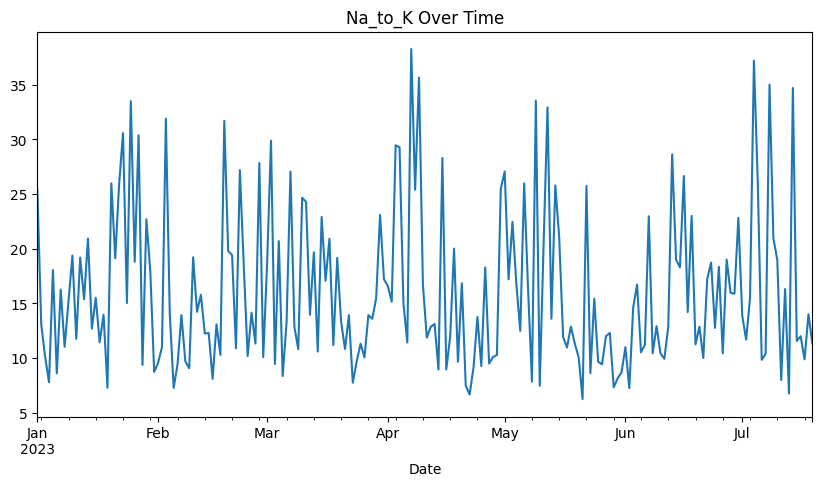

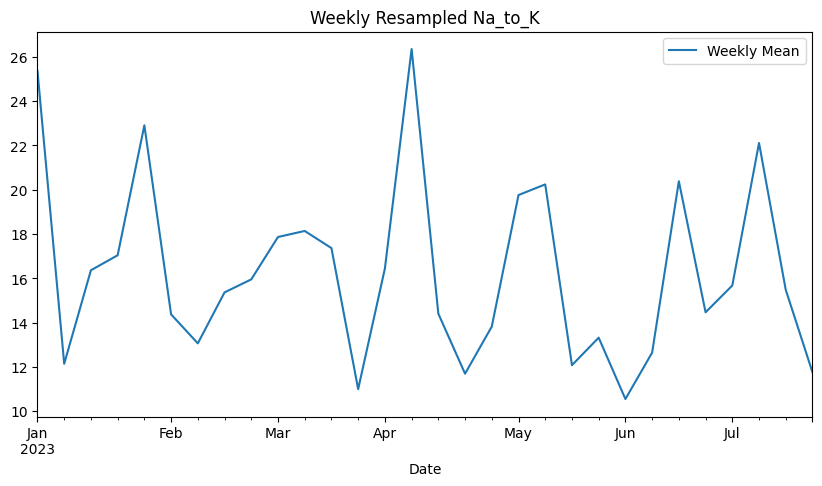

In [26]:
# Correlation Analysis
correlation_matrix = data[['Age', 'Na_to_K']].corr()
print("Correlation Matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Time Series Analysis (if applicable to dataset)
# Simulate a date column for example purposes
import numpy as np
data['Date'] = pd.date_range(start='1/1/2023', periods=len(data), freq='D')
data.set_index('Date', inplace=True)

# Time-based indexing and visualization
data['Na_to_K'].plot(figsize=(10, 5))
plt.title("Na_to_K Over Time")
plt.show()

# Resampling (weekly mean as an example)
weekly_data = data['Na_to_K'].resample('W').mean()
weekly_data.plot(figsize=(10, 5), label='Weekly Mean', legend=True)
plt.title("Weekly Resampled Na_to_K")
plt.show()


1D Statistical Data Analysis:
 count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64
Contingency Table:
 Drug         ?  DrugY  drugA  drugB  drugC  drugX
Age_Bin                                          
Teen         0      8      2      0      1      5
Young Adult  0     33     13      0      5     20
Adult        1     29      8      9      8     18
Senior       0     20      0      7      2     11


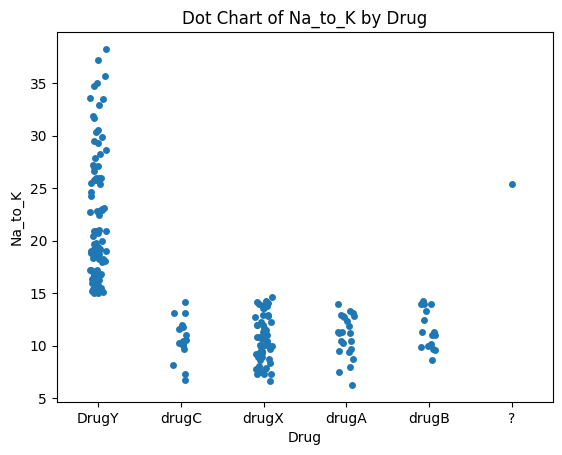

In [27]:
# Statistical summary measures
print("1D Statistical Data Analysis:\n", data['Na_to_K'].describe())

# Contingency Table (e.g., for Age_Bin and Drug)
contingency_table = pd.crosstab(data['Age_Bin'], data['Drug'])
print("Contingency Table:\n", contingency_table)

# Visualizations: Dot chart
sns.stripplot(x='Drug', y='Na_to_K', data=data, jitter=True)
plt.title("Dot Chart of Na_to_K by Drug")
plt.show()


Cluster Assignments:
             Age  Na_to_K  Cluster
Date                             
2023-01-01   23   25.355        1
2023-01-02   47   13.093        2
2023-01-03   47   10.114        2
2023-01-04   28    7.798        0
2023-01-05   61   18.043        2


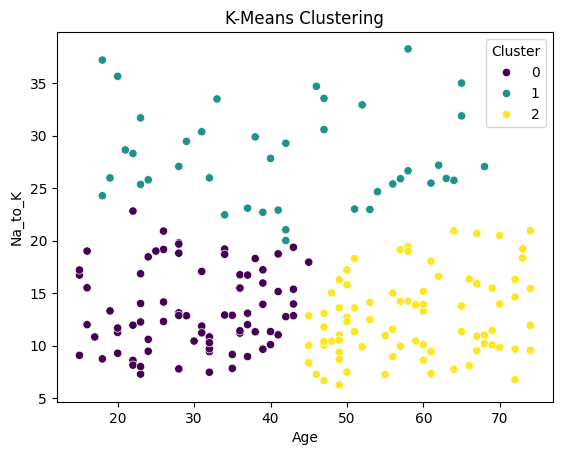

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Na_to_K']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
print("Cluster Assignments:\n", data[['Age', 'Na_to_K', 'Cluster']].head())

# Scatter plot for clusters
sns.scatterplot(x='Age', y='Na_to_K', hue='Cluster', data=data, palette='viridis')
plt.title("K-Means Clustering")
plt.show()


Explained Variance Ratio: [0.53155975 0.46844025]


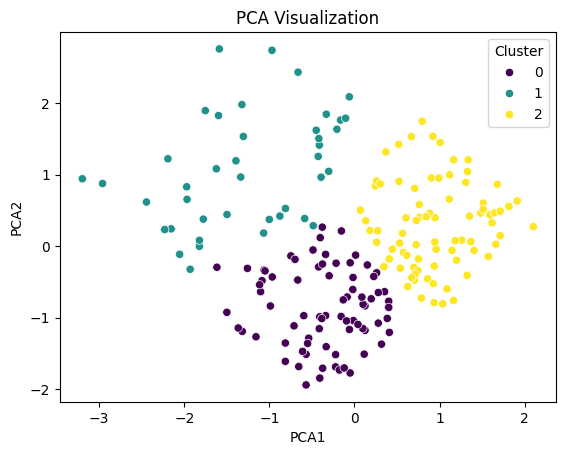

In [29]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title("PCA Visualization")
plt.show()


Mean Squared Error: 50.88258677312415
R2 Score: -0.01415258452970547


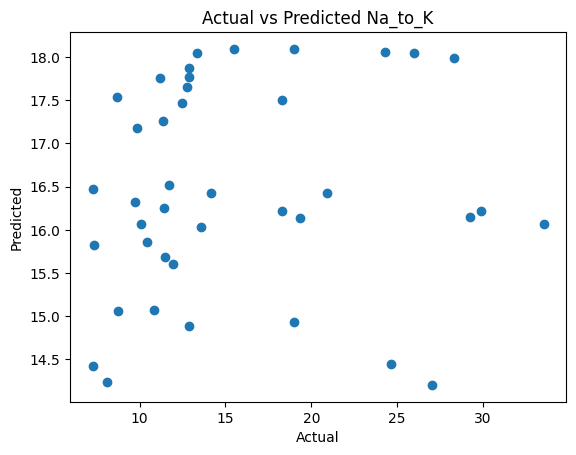

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the BP column
label_encoder = LabelEncoder()
data['BP_encoded'] = label_encoder.fit_transform(data['BP'])

# Preparing data for regression (Na_to_K as target)
X = data[['Age', 'BP_encoded']]  # Use the encoded BP column
y = data['Na_to_K']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

# Plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.title("Actual vs Predicted Na_to_K")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
